In [54]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from particle import Particle, InvalidParticle, ParticleNotFound
from particle_utils import get_charge_from_pdgc, get_name_from_pdgc
import pandas as pd
import mplhep as hep

# Initial FASERvSi studies

Detector setup:
132 layers of Tungsten and 'SCT' (sensitive vacuum)
Tungsten layers are 0.9 mm thick
Gap between Tungsten sheets is 7.08 mm
1000 events generated - mix of $\nu_e$, $\nu_\mu$ and $\nu_\tau$


In [ ]:
data = uproot.open("/home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi_doubleHeight-680fb.root")
# hits = [data[treename] for treename in data.keys() if "Hits" in treename]
hits = data["Hits"]
# truth = data["truth"]

In [36]:
[print(k)for k in hits.keys()];

fEvent
vertex_x
vertex_y
vertex_z
nu_E
nu_px
nu_py
nu_pz
nu_pdgc
target_pdgc
isCC
cclepton_pdgc
cclepton_E
cclepton_px
cclepton_py
cclepton_pz
nHits
x
y
z
E
pdgc
charge
layer


In [46]:
output_dir = "eventPlots/FASERvSi_doubleHeight-680fb-taus/"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# pdgc = hits[-1].arrays("pdgc", library="np")["pdgc"]

# pdgc = set(pdgc)

# for p in pdgc:
#     print(f"pdgc = {p:<13}    name = {get_name_from_pdgc(p):<13}    charge = {get_charge_from_pdgc(p)}")

In [ ]:
def scatter_on_ax(ax, event_data, x_var, y_var, label, color,  alpha=1, marker_size=1):
    
    if len(event_data[x_var]) == 0:
        return None
    
    return ax.scatter(event_data[x_var], event_data[y_var], color=color, marker=",", label=label, alpha=alpha, s=marker_size)

In [ ]:
def set_offsets_on_scatter(scatter, event_data, x_var, y_var):
    
    if len(event_data[x_var]) == 0:
        return None
    
    return scatter.set_offsets(np.c_[event_data[x_var], event_data[y_var]])

In [45]:
event_numbers = hits.arrays("fEvent", library="np")["fEvent"]
tau_event_numbers = hits.arrays("fEvent", library="np", cut="nu_pdgc == 16")["fEvent"]

In [57]:
nu_e = hits.arrays("nu_E", library="np")["nu_E"]
n_hits = hits.arrays("nHits", library="np")["nHits"]

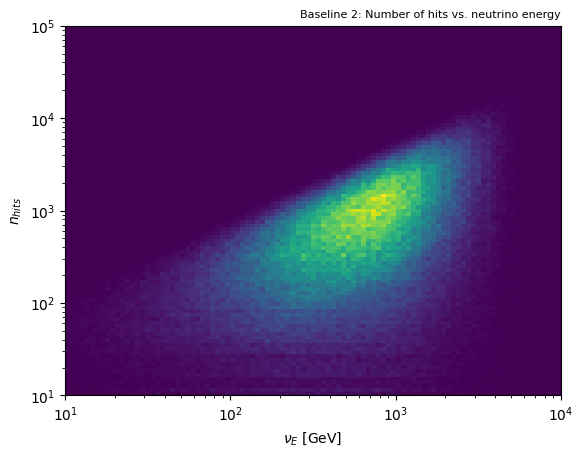

In [74]:
fig, ax = plt.subplots()
ax.hist2d(nu_e, n_hits, bins=(np.logspace(1, 4, 100), np.logspace(1,5, 100)), cmap="viridis")
ax.set_xlabel(r"$\nu_E$ [GeV]")
ax.set_ylabel(r"$n_{hits}$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Baseline 2: Number of hits vs. neutrino energy", loc='right', fontsize=8)
plt.savefig(f"nu_E_vs_n_hits.png", dpi=300, bbox_inches='tight')

In [ ]:
neutrino_pdgc_to_label_dict = {12: r"$\nu_e$",
                               -12: r"$\bar{\nu}_e$",
                               14: r"$\nu_\mu$",
                               -14: r"$\bar{\nu}_\mu$",
                               16: r"$\nu_\tau$",
                               -16: r"$\bar{\nu}_\tau$",
                                }

In [ ]:
! pip install awkward-pandas

In [50]:
events = hits.arrays(hits.keys(), library="pd", cut="nu_pdgc == 16", entry_stop=1000)
print(events)

       fEvent    vertex_x    vertex_y     vertex_z     nu_E     nu_px  \
340  15456311  -91.981120  287.301584  1279.128070  1596.90 -0.301782   
341  79014610  -16.420263 -146.063227  1037.553639   133.48 -0.004497   
343  78793903  -46.713275   35.871160   888.349168   933.37 -0.089603   
345  12164679  113.852630  -81.134847   700.402695  1236.50  0.289687   
346  36547481   66.245984    2.435261  1450.651259   627.96  0.085465   
348  35035719 -114.666424   85.796880   717.084864   819.87 -0.193383   
349  30554737  112.446044   43.863922   753.704420   880.70  0.203644   
351  20077872  116.946768  -22.902878   930.664517   180.79  0.043485   
354  11990084  -74.525903  160.510188  1202.617416   409.97 -0.062750   
355  79040411   78.829498  291.271651  1475.653964   421.10  0.068185   
735  50011723   44.978151    0.607917   755.220258   260.39  0.024067   
736  52371574   32.361133  113.413684  1427.765126   632.32  0.042089   
739  25909492 -102.643193   83.778150  1343.345456 

In [37]:
evt_branches = ["fEvent",
"vertex_x",
"vertex_y",
"vertex_z",
"nu_E",
"nu_px",
"nu_py",
"nu_pz",
"nu_pdgc",
"target_pdgc",
"isCC"]

hits_branches = ["x",
"y",
"z",
"E",
"pdgc",
"charge",
"layer"]

In [31]:
print(events.iloc[0])

fEvent                                                    24803429
vertex_x                                               -109.372319
vertex_y                                               -105.322172
vertex_z                                                549.190689
nu_E                                                        839.01
nu_px                                                    -0.190338
nu_py                                                    -0.183382
nu_pz                                                   839.009958
nu_pdgc                                                         14
target_pdgc                                             1000741840
isCC                                                             1
cclepton_pdgc                                                   13
cclepton_E                                               162.81256
cclepton_px                                               3.864587
cclepton_py                                              -0.66

  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel

-91.9811198686792 287.301584485575 1279.1280696987192
[2112, 2112, 22, -211, -11, 22, -211, ..., 211, -211, 2112, -211, 211, -12, 16]


  1%|          | 1/100 [00:01<01:47,  1.08s/it]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

-16.420263267269714 -146.06322744749738 1037.5536392320535
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., 16, 2112, 2212, 2212, 2112, 16]


  2%|▏         | 2/100 [00:01<01:35,  1.03it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

-46.71327513624392 35.87115991961786 888.3491677003173
[2112, 2112, 2212, 2212, -11, -11, 22, ..., 2112, 2112, 2112, 2112, 13, -14, 16]


  3%|▎         | 3/100 [00:02<01:30,  1.07it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

113.85263040344525 -81.13484725258249 700.4026948438418
[-211, 211, 22, 11, -11, 22, 22, ..., -211, 2112, -211, 2112, 2112, 2112, 16]


  4%|▍         | 4/100 [00:03<01:27,  1.10it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

66.24598364505765 2.435260654161464 1450.6512585145067
[2112, 2112, 2212, 2112, -211, 22, 22, ..., 3122, 2212, 2112, 211, 16, -211]


  5%|▌         | 5/100 [00:05<01:46,  1.12s/it]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

-114.66642387037464 85.7968803300556 717.084863524942
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., 2112, 16, 2112, 2212, 2112, 16]


  6%|▌         | 6/100 [00:06<01:52,  1.20s/it]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

112.44604411763538 43.8639215597615 753.704420266581
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., -12, 16, 2112, 2112, -12, 16]


  7%|▋         | 7/100 [00:07<01:37,  1.05s/it]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

116.94676778276092 -22.902877877188892 930.6645171132502
[11, 22, 211, 11, 22, 22, -11, ..., 2112, 2112, 2112, 2112, 2112, 2112, 2112]


  8%|▊         | 8/100 [00:07<01:25,  1.08it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

-74.52590268952893 160.51018823907125 1202.6174162814602
[2112, 2112, 2112, 2112, 2112, 2112, 2212, ..., 2112, 2112, 2112, 13, -14, 16]


  9%|▉         | 9/100 [00:08<01:16,  1.19it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", 

78.82949810670308 291.27165114100734 1475.6539644256063
[2112, 2112, 2112, 2112, 2112, 2112, 22, ..., 2112, 2112, 2112, 2112, 310, 16]


 10%|█         | 10/100 [00:09<01:10,  1.27it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

44.97815124524748 0.6079166067922277 755.2202579061511
[2112, 2112, 211, 2112, 2212, -321, 2112, ..., 16, 2112, 16, 2112, 16, 2112, 16]


 11%|█         | 11/100 [00:10<01:15,  1.19it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

32.36113284362056 113.41368437817621 1427.765126110372
[2112, 2112, 2112, 2112, 2112, 2212, 2112, ..., 2112, -211, 310, 321, -12, 16]


 12%|█▏        | 12/100 [00:11<01:15,  1.17it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

-102.64319317671549 83.77815039737936 1343.3454560913717
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., -211, 2112, 211, 13, -14, 16]


 13%|█▎        | 13/100 [00:12<01:16,  1.14it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

-17.23711237783039 226.41041155306056 1186.7555563676185
[-211, 310, 2212, 2212, -2212, 2212, 321, ..., 2112, 2112, 2112, 2112, 2112, 16]


 14%|█▍        | 14/100 [00:12<01:15,  1.15it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

9.736732915154453 -109.44280900702034 1362.7239345568992
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., 211, 2112, 2112, 13, -14, 16]


 15%|█▌        | 15/100 [00:13<01:15,  1.13it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

-31.350052150685496 251.4115391035191 1494.9034778895805
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., 2212, 2212, -211, 211, 2112, 16]


 16%|█▌        | 16/100 [00:14<01:13,  1.15it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

106.20782304956974 219.20374782541512 944.8950425341557
[15, 13, -14, 16, 13, -14, 16, 13, -14, ..., -14, 16, 13, -14, 16, 13, -14, 16]


 17%|█▋        | 17/100 [00:15<01:07,  1.23it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

-36.69187804665704 -143.42073491013824 1014.9407136206916
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., 16, 2112, 2112, 16, 2112, 16]


 18%|█▊        | 18/100 [00:16<01:03,  1.28it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

-31.860314269397865 -118.61451407205882 1537.3682120786434
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., -211, 3122, 2112, 321, 16, -211]


 19%|█▉        | 19/100 [00:16<00:58,  1.39it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

-46.769737220027814 82.27846294644897 1475.6299526478927
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., 2112, -211, 2112, 13, -14, 16]


 20%|██        | 20/100 [00:17<00:54,  1.46it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

-28.579310877649522 200.3592496184311 955.5856291644118
[2112, 2112, 2112, 2112, 2112, 2112, 2112, ..., 16, 2112, 2112, 16, 2112, 2112]


 21%|██        | 21/100 [00:17<00:52,  1.51it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

-35.048368231025044 274.0026281534685 716.284365061728
[2112, 2112, 2112, 2112, 2112, 2112, ..., 2112, 2112, 16, 2112, 2112, 2112]


 22%|██▏       | 22/100 [00:18<00:51,  1.53it/s]/tmp/ipykernel_95232/3594647205.py:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
/tmp/ipykernel_95232/3594647205.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z",

101.34836150158532 254.3331803618029 1455.584078184572
[2112, 2112, 2112, 211, 2112, 2212, 2212, ..., 2112, 2212, 211, 211, -211, 16]


 23%|██▎       | 23/100 [00:22<01:13,  1.04it/s]


IndexError: single positional indexer is out-of-bounds

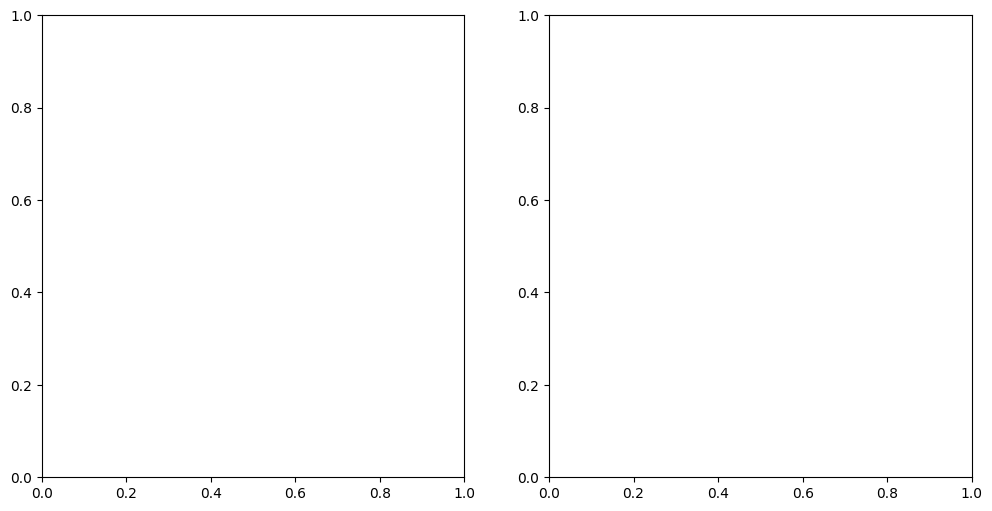

In [51]:

for i in tqdm(range(0, 100)):
    
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

    truth_info = events.iloc[i]

    neutrino_pdgc = truth_info['nu_pdgc']
    neutrino_energy = truth_info['nu_E']
    target_pdgc = truth_info['target_pdgc']
    event_number = truth_info['fEvent']
    vx = truth_info['vertex_x']
    vy = truth_info['vertex_y']
    vz = truth_info['vertex_z']
    print(vx, vy, vz)
    is_cc = bool(truth_info['isCC'])
    is_cc_label = "CC" if is_cc else "NC"
    
    ax[0].scatter(vz, vy, color="black", marker='x', s=1.5, label="primary vertex", zorder=100)
    ax[1].scatter(vx, vy, color="black", marker='x', s=1.5, label="primary vertex", zorder=100)
    
    
    
    kinematics = truth_info[hits_branches] #station.arrays(station.keys(), library="ak", cut=f"(fEvent == {event_numbers[i]}) & (z > 0)")
    print(kinematics['pdgc'])
    # print(kinematics)
    
    marker_size = 1
    alpha = 1
    
    electrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 11)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
    muons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 13)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
    taus = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 15)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
    gluons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 21)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
    photons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) == 22)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
    hadrons = { key: np.array(kinematics[key])[np.where(np.abs(kinematics['pdgc']) > 37)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}
    hadrons = pd.DataFrame(hadrons)
    charged_hadrons = { key: np.array(hadrons[key])[np.where(np.abs(hadrons['pdgc']) > 37)] for key in ["x", "y", "z", "E", "pdgc", "charge", "layer"]}

    
    # electrons = kinematics[np.where(np.abs(kinematics['pdgc']) == 11]
    # muons = kinematics[np.where(np.abs(kinematics['pdgc']) == 13)]
    # taus = kinematics[np.where(np.abs(kinematics['pdgc']) == 15)]
    
    # gluons = kinematics[np.where(np.abs(kinematics['pdgc']) == 21)]
    # photons = kinematics[np.where(np.abs(kinematics['pdgc']) == 22)]
    # charged_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
    # neutral_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
    # charged_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['charge']) != 0)]
    # neutral_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['charge']) == 0)]
    
    # scatter_on_ax(ax[0], neutral_hadrons, "z", "y", "neutral hadrons", 'grey', alpha=0.5, marker_size=marker_size)
    scatter_on_ax(ax[0], charged_hadrons, "z", "y", "charged hadrons", 'forestgreen', alpha=alpha, marker_size=marker_size)
    # scatter_on_ax(ax[0], photons, "z", "y", r"$\gamma$", 'yellow', alpha=0.5, marker_size=marker_size)
    # scatter_on_ax(ax[0], gluons, "z", "y", r"$g$", 'orange', alpha=0.5, marker_size=marker_size)
    scatter_on_ax(ax[0], electrons, "z", "y", r"$e^\pm$", 'lightblue', alpha=alpha, marker_size=marker_size)
    scatter_on_ax(ax[0], muons, "z", "y", r"$\mu^\pm$", 'tomato', alpha=alpha, marker_size=marker_size)
    scatter_on_ax(ax[0], taus, "z", "y", r"$\tau^\pm$", 'purple', alpha=alpha, marker_size=marker_size)
    
    # scatter_on_ax(ax[0], neutral_hadrons, "x", "y", "neutral hadrons", 'grey', alpha=0.5, marker_size=marker_size)
    scatter_on_ax(ax[1], charged_hadrons, "x", "y", "charged hadrons", 'forestgreen', alpha=alpha, marker_size=marker_size)
    # scatter_on_ax(ax[0], photons, "x", "y", r"$\gamma$", 'yellow', alpha=0.5, marker_size=marker_size)
    # scatter_on_ax(ax[0], gluons, "x", "y", r"$g$", 'orange', alpha=0.5, marker_size=marker_size)
    scatter_on_ax(ax[1], electrons, "x", "y", r"$e^\pm$", 'lightblue', alpha=alpha, marker_size=marker_size)
    scatter_on_ax(ax[1], muons, "x", "y", r"$\mu^\pm$", 'tomato', alpha=alpha, marker_size=marker_size)
    scatter_on_ax(ax[1], taus, "x", "y", r"$\tau^\pm$", 'purple', alpha=alpha, marker_size=marker_size)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    
    ax[0].set_title(f"{is_cc_label} {neutrino_pdgc_to_label_dict[neutrino_pdgc]} + {get_name_from_pdgc(target_pdgc)}", loc="left")
    ax[0].set_title(f"Neutrino energy = {neutrino_energy:.2f} GeV", loc="right")
    ax[1].set_title(f"Event Number: {event_number}", loc="right")
    
    ax[0].legend(by_label.values(), by_label.keys())# , ncols=2) #, loc='center right', bbox_to_anchor=(1.55, 0.75))
    ax[1].legend(by_label.values(), by_label.keys())# , ncols=2) #, loc='center right', bbox_to_anchor=(1.55, 0.75)) 
    
    ax[0].set_xlabel("z position (mm)")
    ax[0].set_ylabel("y position (mm)")
    ax[0].set_xlim((550, 1600))
    ax[0].set_ylim((-300, 300))
    
    ax[1].set_xlabel("x position (mm)")
    ax[1].set_ylabel("y position (mm)")
    ax[1].set_xlim((-125, 125))
    ax[1].set_ylim((-300, 300))
    
    plt.savefig(f"{output_dir}/event_{i}_particle-dist-x-y-z-y.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()
    # break
        

In [ ]:
true_tau_events = truth.arrays(truth.keys(), library='ak', cut="(nu_pdgc == 16) | (nu_pdgc == -16)")    
print(true_tau_events['fEvent'])

In [ ]:
for event_number in tqdm(true_tau_events['fEvent']):
    
    fig, ax = plt.subplots(ncols=2, figsize=(18, 6))

    truth_info = truth.arrays(truth.keys(), library="ak", cut=f"fEvent == {event_number}")
    
    neutrino_pdgc = truth_info['nu_pdgc'][0]
    neutrino_energy = truth_info['nu_E'][0]
    target_pdgc = truth_info['target_pdgc'][0]
    event_number = truth_info['fEvent'][0]
    vx = truth_info['vertex_x']
    vy = truth_info['vertex_y']
    vz = truth_info['vertex_z']
    is_cc = bool(truth_info['isCC'][0])
    is_cc_label = "CC" if is_cc else "NC"
    
    ax[0].scatter(vz, vy, color="black", marker='x', s=1.5, label="primary vertex", zorder=100)
    ax[1].scatter(vx, vy, color="black", marker='x', s=1.5, label="primary vertex", zorder=100)
    
    for s, station in enumerate(hits):
        
        kinematics = station.arrays(station.keys(), library="ak", cut=f"(fEvent == {event_number}) & (z > 0)")
        
        # print(kinematics)
        
        marker_size = 1
        alpha = 1
        
        electrons = kinematics[np.where(np.abs(kinematics['pdgc']) == 11)]
        muons = kinematics[np.where(np.abs(kinematics['pdgc']) == 13)]
        taus = kinematics[np.where(np.abs(kinematics['pdgc']) == 15)]
        
        gluons = kinematics[np.where(np.abs(kinematics['pdgc']) == 21)]
        photons = kinematics[np.where(np.abs(kinematics['pdgc']) == 22)]
        charged_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        neutral_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        charged_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) != 0)]
        neutral_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) == 0)]
        
        # scatter_on_ax(ax[0], neutral_hadrons, "z", "y", "neutral hadrons", 'grey', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax[0], charged_hadrons, "z", "y", "charged hadrons", 'forestgreen', alpha=alpha, marker_size=marker_size)
        # scatter_on_ax(ax[0], photons, "z", "y", r"$\gamma$", 'yellow', alpha=0.5, marker_size=marker_size)
        # scatter_on_ax(ax[0], gluons, "z", "y", r"$g$", 'orange', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax[0], electrons, "z", "y", r"$e^\pm$", 'lightblue', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax[0], muons, "z", "y", r"$\mu^\pm$", 'tomato', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax[0], taus, "z", "y", r"$\tau^\pm$", 'purple', alpha=alpha, marker_size=marker_size)
        
        # scatter_on_ax(ax[0], neutral_hadrons, "x", "y", "neutral hadrons", 'grey', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax[1], charged_hadrons, "x", "y", "charged hadrons", 'forestgreen', alpha=alpha, marker_size=marker_size)
        # scatter_on_ax(ax[0], photons, "x", "y", r"$\gamma$", 'yellow', alpha=0.5, marker_size=marker_size)
        # scatter_on_ax(ax[0], gluons, "x", "y", r"$g$", 'orange', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax[1], electrons, "x", "y", r"$e^\pm$", 'lightblue', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax[1], muons, "x", "y", r"$\mu^\pm$", 'tomato', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax[1], taus, "x", "y", r"$\tau^\pm$", 'purple', alpha=alpha, marker_size=marker_size)
        
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    
    ax[0].set_title(f"{is_cc_label} {neutrino_pdgc_to_label_dict[neutrino_pdgc]} + {get_name_from_pdgc(target_pdgc)}", loc="left")
    ax[0].set_title(f"Neutrino energy = {neutrino_energy/1e3:.2f} GeV", loc="right")
    ax[1].set_title(f"Event Number: {event_number}", loc="right")
    
    ax[0].legend(by_label.values(), by_label.keys())# , ncols=2) #, loc='center right', bbox_to_anchor=(1.55, 0.75))
    ax[1].legend(by_label.values(), by_label.keys())# , ncols=2) #, loc='center right', bbox_to_anchor=(1.55, 0.75)) 
    
    ax[0].set_xlabel("z position (mm)")
    ax[0].set_ylabel("y position (mm)")
    ax[0].set_xlim((550, 1600))
    ax[0].set_ylim((-150, 150))
    
    ax[1].set_xlabel("x position (mm)")
    ax[1].set_ylabel("y position (mm)")
    ax[1].set_xlim((-125, 125))
    ax[1].set_ylim((-150, 150))
    
    plt.savefig(f"{output_dir}/event_{i}_particle-dist-x-y-z-y.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    # break
        

In [ ]:
# %matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib as mpl
# Set the ffmpeg path
plt.rcParams["animation.html"] = "jshtml"


# Create a figure and axis
fig, ax = plt.subplots()
x = np.linspace(0, 2 * np.pi, 100)
line, = ax.plot(x, np.sin(x))

# Update function for animation
def update(frame):
    line.set_ydata(np.sin(x + frame / 10.0))  # Update the data.
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=100, blit=True)
from IPython.display import HTML
HTML(ani.to_jshtml())
# plt.show()

# Save the animation (optional)
# ani.save('animation.mp4', writer='ffmpeg') // NOTE: Saving animation blocks inline animation from being rendered




In [ ]:
def get_station_charged_hits(station, event_number):
    kinematics = station.arrays(station.keys(), library="ak", cut=f"(fEvent == {event_number}) & (z > 0)")
    electrons = kinematics[np.where(np.abs(kinematics['pdgc']) == 11)]
    muons = kinematics[np.where(np.abs(kinematics['pdgc']) == 13)]
    taus = kinematics[np.where(np.abs(kinematics['pdgc']) == 15)]
    
    charged_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
    charged_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) != 0)]
    
    return electrons, muons, taus, charged_hadrons
    

In [ ]:
# %matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"

data = uproot.open("/home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi.1000.HITS.root")
hits = [data[treename] for treename in data.keys() if "Hits" in treename]
truth = data["truth"]

def make_hit_animation(hits, truth, event_number):
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    marker_size = 1
    alpha = 1
    os.makedirs(f"{event_number}_frames", exist_ok=True)
    
    # Get truth data
    truth_info = truth.arrays(truth.keys(), library='ak', cut=f"fEvent == {event_number}")
    neutrino_pdgc = truth_info['nu_pdgc'][0]
    neutrino_energy = truth_info['nu_E'][0]
    target_pdgc = truth_info['target_pdgc'][0]
    event_number = truth_info['fEvent'][0]
    vx = truth_info['vertex_x']
    vy = truth_info['vertex_y']
    vz = truth_info['vertex_z']
    
    # Setup plot
    charged_had_scatter  = ax.scatter([], [], label="charged hadrons", color='forestgreen', alpha=alpha, s=marker_size, marker=',')
    electron_scatter     = ax.scatter([], [], label=r"$e^\pm$", color='lightblue', alpha=alpha, s=marker_size, marker=',')
    muon_scatter         = ax.scatter([], [], label=r"$\mu^\pm$", color='tomato', alpha=alpha, s=marker_size, marker=',')
    tau_scatter          = ax.scatter([], [], label=r"$\tau^\pm$", color='purple', alpha=alpha, s=marker_size, marker=',')
    vtx_scatter          = ax.scatter([], [], label="primary vertex", color='black', alpha=alpha, s=marker_size, marker='x')
    ax.set_xlabel("x position (mm)")
    ax.set_ylabel("y position (mm)")
    ax.set_xlim((-125, 125))
    ax.set_ylim((-150, 150))
    ax.set_title(f"{neutrino_pdgc_to_label_dict[neutrino_pdgc]} + {get_name_from_pdgc(target_pdgc)}    Neutrino energy = {neutrino_energy/1e3:.2f} GeV    Event Number: {event_number}    SCT Layer = {1}", loc="left", fontsize=7)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())# , ncols=2) #, loc='center right', bbox_to_anchor=(1.55, 0.75))
    
    # Init function
    def init():
        charged_had_scatter.set_offsets(np.empty((0, 2)))
        electron_scatter.set_offsets(np.empty((0, 2)))   
        muon_scatter.set_offsets(np.empty((0, 2)))       
        tau_scatter.set_offsets(np.empty((0, 2)))        
        vtx_scatter.set_offsets(np.empty((0, 2)))        
        
        return charged_had_scatter, electron_scatter, muon_scatter, tau_scatter, vtx_scatter     
    
    # Update function for animation
    def update(frame, hits, truth_info, event_number):
        kinematics = hits[frame].arrays(hits[frame].keys(), library="ak", cut=f"(fEvent == {event_number}) & (z > 0)")
        
        # print(frame, kinematics) #hits[frame].arrays(hits[frame].keys() , library="ak"))
        
        neutrino_pdgc = truth_info['nu_pdgc'][0]
        neutrino_energy = truth_info['nu_E'][0]
        target_pdgc = truth_info['target_pdgc'][0]
        event_number = truth_info['fEvent'][0]
        vx = truth_info['vertex_x']
        vy = truth_info['vertex_y']
        vz = truth_info['vertex_z']
        
        electrons = kinematics[np.where(np.abs(kinematics['pdgc']) == 11)]
        muons = kinematics[np.where(np.abs(kinematics['pdgc']) == 13)]
        taus = kinematics[np.where(np.abs(kinematics['pdgc']) == 15)]
        
        charged_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        charged_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) != 0)]
        
        charged_had_scatter.set_offsets(np.c_[charged_hadrons["x"], charged_hadrons["y"]])
        electron_scatter.set_offsets(np.c_[electrons["x"], electrons['y']])
        muon_scatter.set_offsets(np.c_[muons["x"], muons['y']])
        tau_scatter.set_offsets(np.c_[taus["x"], taus['y']])
        
        if len(electrons) != 0 or len(muons) != 0 or len(taus) != 0 or len(charged_hadrons) != 0:
            vtx_scatter.set_offsets(np.c_[vx, vy])

        fig.savefig(f"{event_number}_frames/{event_number}-hit-layer-{frame}.png", dpi=300)
        ax.set_title(f"{neutrino_pdgc_to_label_dict[neutrino_pdgc]} + {get_name_from_pdgc(target_pdgc)}    Neutrino energy = {neutrino_energy/1e3:.2f} GeV    Event Number: {event_number}    SCT Layer = {frame+1}", loc="left", fontsize=7)
        return charged_had_scatter, electron_scatter, muon_scatter, tau_scatter, vtx_scatter

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=tqdm(range(len(hits))), blit=True, init_func=init, fargs=(hits, truth_info, event_number))
    from IPython.display import HTML
    HTML(ani.to_jshtml())
    # plt.show()

    # Save the animation (optional)
    ani.save(f'{event_number}.mp4', writer='ffmpeg') # NOTE: Saving animation blocks inline animation from being rendered

make_hit_animation(hits, truth, 92600902)
